# Clase 6 de agosto de 2021 #
## Sistemas de ecuaciones lineales ##
![XKCD](img/1838.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Sistemas de ecuaciones lineales ###
Una ecuación lineal es una igualdad que tiene la forma:  
$\sum{a_i x_i}=y$  
Un sistema de ecuaciones lineales es un set de ecuaciones lineales que comparten las mismas variables. Por ejemplo:  
$a_1x_1 + a_2x_2 = y_1$  
$a_3x_1 + a_4x_2 = y_2$  

La forma matricial de un sistema de ecuaciones lineales se expresa como $Ax=y$  
$\begin{bmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,n}\\
a_{2,1} & a_{2,2} & \dots & a_{2,n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{m,1} & a_{m,2} & \dots & a_{m,n}
\end{bmatrix}
\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots\\
x_{m}
\end{bmatrix} 
=
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{m}
\end{bmatrix} $  

Soluciones a sistemas de ecuaciones lineales:  
- Caso 1: No hay solución -> rango([A,y]) = rango(A)+1
- Caso 2: Existe una única solución -> rango([A,y]) = rango(A)
- Caso 3: Existen infinitas soluciones -> rango([A,y]) = rango(A) & rango(A) < n   

Si tenemos un sistema como el anterior $Ax=y$ donde $A$ es una matriz de $m \times n$ significa que tenemos un sistema con $m$ ecuaciones y $n$ incógnitas.

**Ejemplo**: Escribe en forma matricial el siguiente sistema de ecuaciones:  
\begin{align*}
4x+3y-5z&=2\\
-2x-4y+5z&=5\\
7x+8y&=-3\\
x+2z&=1\\
9+y-6z&=6
\end{align*}

In [2]:
x=1
y=1
z=1

A = np.array([
    [4, 3, -5],
    [-2, -4, 5],
    [7, 8, 0],
    [1, 0, 2],
    [0, 1, -6]
])
vector_x = np.array(["x","y","z"])
vector_y = np.array([2, 5, -3, 1, -3])

In [3]:
print(A)

[[ 4  3 -5]
 [-2 -4  5]
 [ 7  8  0]
 [ 1  0  2]
 [ 0  1 -6]]


In [4]:
vector_x

array(['x', 'y', 'z'], dtype='<U1')

In [5]:
vector_y

array([ 2,  5, -3,  1, -3])

In [6]:
vector_y.reshape(5,1)

array([[ 2],
       [ 5],
       [-3],
       [ 1],
       [-3]])

In [7]:
# Matriz aumentada
np.hstack((A, vector_y.reshape(5,1)))

array([[ 4,  3, -5,  2],
       [-2, -4,  5,  5],
       [ 7,  8,  0, -3],
       [ 1,  0,  2,  1],
       [ 0,  1, -6, -3]])

**¿Cómo se resuelven?**
- Método de eliminación gaussiana
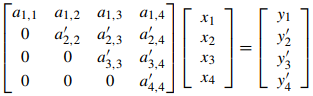

$a'_{4,4}\cdot x_4 = y'_4$  
$a'_{3,3}\cdot x_3 + a'_{3,4}\cdot x_4 = y'_3$  
Seguir sustiyendo hacia atrás..

- Método de eliminación de Gauss-Jordan
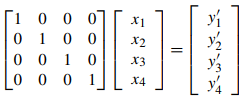

$x_1 = y'_1$  
$x_2 = y'_2$  
$x_3 = y'_3$  
$x_4= y'_4$  


**Ejemplo (Metodo de eliminacion de Gauss Jordan)**:  

$\begin{align*}
4x_1+3x_2-5x_3&=2 \\  
-2x_1-4x_2+5x_3&=5 \\
8x_1+8x_2&=-3
\end{align*}
$


In [8]:
# Definimos nuestra matriz de coeficientes y nuestro vector de resultados
A = np.array([
    [4.0,3,-5],
    [-2,-4,5],
    [8,8,0]
])
y = np.array([2.0,5,-3])

# Creamos la matriz aumentada
A_aum = np.hstack((A, y.reshape(3,1)))

# Transformamos hasta obtener el resultado
A_aum[0] = A_aum[0]/4
A_aum[1] = A_aum[0]*2 + A_aum[1]
A_aum[2] = A_aum[2] + A_aum[0]*(-8)
A_aum[1] = A_aum[1]/(-2.5)
A_aum[2] = A_aum[2] + A_aum[1]*(-2)
A_aum[0] = A_aum[0] + A_aum[1]*(-0.75)
A_aum[2] = A_aum[2]/12
A_aum[1] = A_aum[1] + A_aum[2]
A_aum[0] = A_aum[0] + A_aum[2]*0.5
A_aum

array([[ 1.        ,  0.        ,  0.        ,  2.20833333],
       [ 0.        ,  1.        ,  0.        , -2.58333333],
       [ 0.        ,  0.        ,  1.        , -0.18333333]])

In [9]:
x = A_aum[:,3]
np.isclose(A@x,y)

array([ True,  True,  True])

**Factorización**
- Factorización LU: Se utiliza en matrices cuadradas y descompone una matriz en dos componentes.  
$A = L\cdot U$
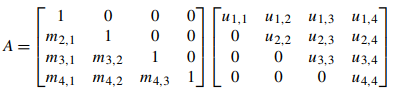
Podemos convertir nuestro sistema de ecuaciones en:  
$LUx=y$  
Si definimos $M=Ux$ entonces el sistema de ecuaciones queda como:  
$LM=y$

$A = L\cdot U \cdot P$

In [10]:
from scipy.linalg import lu
A = np.arange(9).reshape(3,3)
A

P, L, U = lu(A)
print(P)
print(L)
print(U)
P@L@U

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.5 0.5 1. ]]
[[6. 7. 8.]
 [0. 1. 2.]
 [0. 0. 0.]]


array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

**¿Cómo se resuelven?**
- Método de Gauss-Siedel (método iterativo)  
Vamos a tener una estimación inicial, utiliza la última estimación de cada incógnita para iterar hasta converger a la solución

$\begin{align*}
4x_1+3x_2-5x_3&=2 \\  
-2x_1-4x_2+5x_3&=5 \\
8x_1+8x_2&=-3 \\
6x_1+4x_2+5x_3&=2
\end{align*}
$

In [21]:
# Algoritmo Gauss Siedel
A = np.array([
    [4.0,3,-5],
    [-2,-4,5],
    [8,8,0]
])
y = np.array([2.0,5,-3])

# Estimaciones iniciales
x1 = 0.0
x2 = 0.0
x3 = 0.0
x_old = np.array([x1, x2, x3])
# x es el vector que se irá actualizando
x = np.array([np.nan, np.nan, np.nan])

# Tolerancia y una variable que nos indique si ha convergido
tol = 0.01
convergencia = False
num_iter = 10

for i in range(1, num_iter+1):
    print('Iteracion ', i)
    x1 = (2 - 3*x2 + 5*x3)/4
    x2 = (5 + 2*x1 -5*x3)/(-4)
    x3 = (2 - 6*x1 - 4*x2)/5
    
    x = np.array([x1, x2, x3])
    
    print('x1:',x1,'\tx2:', x2,'\tx3:', x3)
    
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    if dx < tol:
        convergencia = True
        print('Termino!!')
        break
    
    x_old = x
    print('-----------')
print('No convergio!!')

Iteracion  1
x1: 0.5 	x2: -1.5 	x3: 1.0
-----------
Iteracion  2
x1: 2.875 	x2: -1.4375 	x3: -1.9
-----------
Iteracion  3
x1: -0.796875 	x2: -3.2265625 	x3: 3.9375
-----------
Iteracion  4
x1: 7.841796875 	x2: -0.2490234375 	x3: -8.8109375
-----------
Iteracion  5
x1: -10.326904296875 	x2: -7.1002197265625 	x3: 18.4724609375
-----------
Iteracion  6
x1: 28.915740966796875 	x2: 7.3827056884765625 	x3: -40.2050537109375
-----------
Iteracion  7
x1: -55.2933464050293 	x2: -23.859643936157227 	x3: 85.83973083496093
-----------
Iteracion  8
x1: 125.69439649581909 	x2: 43.202465295791626 	x3: -184.9952480316162
-----------
Iteracion  9
x1: -263.145909011364 	x2: -100.92110553383827 	x3: 396.9119752407074
-----------
Iteracion  10
x1: 572.330798201263 	x2: 208.72456995025277 	x3: -853.3766138017178
-----------
No convergio!!


**Ejercicio**:  

Hacer que converja nuestro sistema de ecuaciones reordenando las ecuaciones de tal forma que tengamos una diagonal dominante

In [29]:
A2 = A.copy()
A2 = np.hstack((A2, y.reshape(len(y),1)))
A2[2] = A2[2]+A2[1]
A2[2] = A2[2]-A2[0]
A2[1] = A2[1]+A2[0]
A2[[0,1]] = A2[[1,0]]
A2[1] = A2[1]-2*A2[0]
A2

array([[  2.,  -1.,   0.,   7.],
       [  0.,   5.,  -5., -12.],
       [  2.,   1.,  10.,   0.]])

In [33]:
# Estimaciones iniciales
x1 = 0.0
x2 = 0.0
x3 = 0.0
x_old = np.array([x1, x2, x3])
# x es el vector que se irá actualizando
x = np.array([np.nan, np.nan, np.nan])

# Tolerancia y una variable que nos indique si ha convergido
tol = 0.0001
convergencia = False
num_iter = 10

for i in range(1, num_iter+1):
    print('Iteracion ', i)
    x1 = (7 + 1*x2 + 0*x3)/2
    x2 = (-12 + 0*x1 + 5*x3)/5
    x3 = (0 - 2*x1 - 1*x2)/10
    
    x = np.array([x1, x2, x3])
    
    print('x1:',x1,'\tx2:', x2,'\tx3:', x3)
    
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print('-----------')
    
    if dx < tol:
        convergencia = True
        print('Termino!!')
        break
    
    x_old = x
    
    if i==num_iter:
        print('No convergio!!')

Iteracion  1
x1: 3.5 	x2: -2.4 	x3: -0.45999999999999996
-----------
Iteracion  2
x1: 2.3 	x2: -2.8600000000000003 	x3: -0.17399999999999993
-----------
Iteracion  3
x1: 2.07 	x2: -2.574 	x3: -0.1566
-----------
Iteracion  4
x1: 2.213 	x2: -2.5566 	x3: -0.18694000000000002
-----------
Iteracion  5
x1: 2.2217000000000002 	x2: -2.58694 	x3: -0.18564600000000006
-----------
Iteracion  6
x1: 2.20653 	x2: -2.585646 	x3: -0.18274139999999997
-----------
Iteracion  7
x1: 2.2071769999999997 	x2: -2.5827414 	x3: -0.18316125999999994
-----------
Iteracion  8
x1: 2.2086293 	x2: -2.58316126 	x3: -0.18340973400000005
-----------
Iteracion  9
x1: 2.20841937 	x2: -2.583409734 	x3: -0.18334290060000002
-----------
Iteracion  10
x1: 2.208295133 	x2: -2.5833429006 	x3: -0.18332473654
-----------
No convergio!!


**Resolver sistemas de ecuaciones con Numpy**

In [13]:
# Resolver ecuaciones lineales con numpy
np.linalg.solve(A, y)

array([ 2.20833333, -2.58333333, -0.18333333])

In [14]:
A_inv = np.linalg.inv(A)
A_inv@y

array([ 2.20833333, -2.58333333, -0.18333333])

### Ejercicio ###
Construcción de curva yield

In [15]:
import pandas as pd

bonos = pd.DataFrame({
    'Bono': ["A", "B", "C"],
    'Precio': [947.12, 904.29, 980.99],
    'Valor Nominal': [1000,1000,1000],
    'Tasa Cupon': ["5%","8%","10%"],
    'Años a Vencimiento': [2,3,4]
})
bonos

,Bono,Precio,Valor Nominal,Tasa Cupon,Años a Vencimiento
0,A,947.12,1000,5%,2
1,B,904.29,1000,8%,3
2,C,980.99,1000,10%,4


Supongamos que los bonos tienen pagos anuales y las tasas son anuales  
$947.12=50\cdot df_1 + 1050\cdot df_2$   
$904.29=80\cdot df_1 +80\cdot df_2 + 1080\cdot df_3$    
$980.99=100\cdot df_1+100\cdot df_2+100\cdot df_3+1100\cdot df_4$   
$Flujos\cdot DF = P$


In [16]:
P = np.array(bonos['Precio'])
P

DF = np.zeros(4)

Flujos = np.array([
    [50,1050,0,0],
    [80,80,1080,0],
    [100,100,100,1100]
])

In [44]:
print(f"m: {Flujos.shape[0]}\tn: {Flujos.shape[1]}")
print(f'Rango Matriz Flujos: {np.linalg.matrix_rank(Flujos)}')
print(f'Rango Matriz Aumentada Flujos: {np.linalg.matrix_rank(np.hstack((Flujos, P.reshape(len(P),1))))}')

m: 3	n: 4
Rango Matriz Flujos: 3
Rango Matriz Aumentada Flujos: 3


In [47]:
np.linalg.lstsq(Flujos,P, rcond=None)[0]

array([0.15450098, 0.89466186, 0.75958979, 0.72737703])

**Ejercicio:** Resolver este sistema de ecuaciones

**Más métodos de factorización**
- Factorización QR: se utiliza en matrices $m\times n$.  
$A=Q\cdot R$  
En donde $Q$ es una matriz $m \times m$ y $R$ es una matriz triangular superior de tamaño $m \times n$

- Factorización de Cholesky: Se utiliza en matrices cuadradas positivas.  
$A=L\cdot L^T$  
en donde $L$ es una matriz triangular inferior.

- Eigenvalores y eigenvectores: Se utiliza en matrices cuadradas.
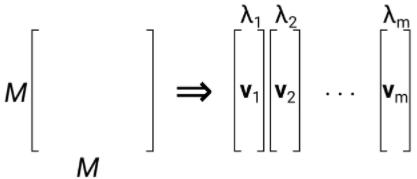

Ecuación de eigenvalores:  
**$Av=\lambda v$**

In [ ]:
A = np.array([
    [1,2],
    [3,-4]
])
v = np.array([2,1])
lambd = 2

- Singular Value Decomposition (SVD): Podemos verlo como una generalización de la eigendescomposición.  
$A=U\cdot \Sigma \cdot V^T$  
En donde $A$ es una matriz de $m\times n$ que buscamos descomponer en sus partes constitutivas.  
$U$ es una matriz de $m\times m$  
$\Sigma$ es una matriz diagonal de $m\times n$  
$V^T$ es la matriz transpuesta de $V$ de dimensiones $n\times n$

**Principal Components Analysis (PCA)**  
El objetivo del PCA es identificar una base tal que cada vector que conforma la base maximiza la covarianza manteniendo la ortogonalidad a todos los demás vectores que conforman la base.  

Es un método que sirve para reducir la dimensionalidad de los datos, podemos pensarlo como si proyectaramos una matriz con $m$ columnas en un subespacio con $m$ o menos columnas manteniendo la esencia de los datos originales.  

1. Calculamos el promedio de cada columna.
2. Centramos los valores de cada columna.
3. Calculamos la matriz de covarianza de los datos centrados.
4. Calculamos la eigendescomposición de la matriz de covarianza.

Documentación Quandl para obtener las tasas yield:  
https://www.quandl.com/tools/python  
https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md

**Ejemplo: Movimientos en las tasas de interés**
![Curvas](img/curves_mov.png)

In [133]:
import quandl
data = quandl.get("USTREASURY/YIELD", start_date="2016-09-01", end_date="2021-09-01")
data = data.dropna(axis=1)
data

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2016-09-01,0.27,0.33,0.47,0.60,0.78,0.91,1.18,1.44,1.57,1.90,2.23
2016-09-02,0.25,0.33,0.45,0.59,0.80,0.92,1.20,1.47,1.60,1.95,2.28
2016-09-06,0.24,0.32,0.45,0.56,0.74,0.86,1.13,1.40,1.55,1.90,2.24
2016-09-07,0.25,0.34,0.49,0.57,0.74,0.86,1.12,1.39,1.54,1.89,2.23
2016-09-08,0.26,0.35,0.50,0.57,0.78,0.91,1.19,1.46,1.61,1.98,2.32
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,0.04,0.05,0.06,0.07,0.25,0.46,0.84,1.13,1.34,1.87,1.94
2021-08-27,0.04,0.05,0.05,0.07,0.22,0.41,0.79,1.09,1.31,1.84,1.91
2021-08-30,0.04,0.05,0.05,0.08,0.20,0.40,0.77,1.07,1.29,1.82,1.90
